In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Splliting Into test train and validation
import splitfolders

input_folder = 'Data sets original/'


splitfolders.ratio(input_folder, output="Data set resize",
                   seed=42, ratio = (.7, .15, .15),
                    group_prefix=None)

In [ ]:
import tensorflow_datasets as tfds
training_data = tfds.load(
    "fashion_mnist",
    split="train",
    as_supervised=True,
    shuffle_files=False,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePGUEFM/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePGUEFM/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data set resize/train",
    image_size=(256, 256),
    batch_size=32
)

Found 147 files belonging to 3 classes.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data set resize/test",
    image_size=(256, 256),
    batch_size=32
)

Found 33 files belonging to 3 classes.


In [ ]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data set resize/val",
    image_size=(256, 256),
    batch_size=32
)

Found 42 files belonging to 3 classes.


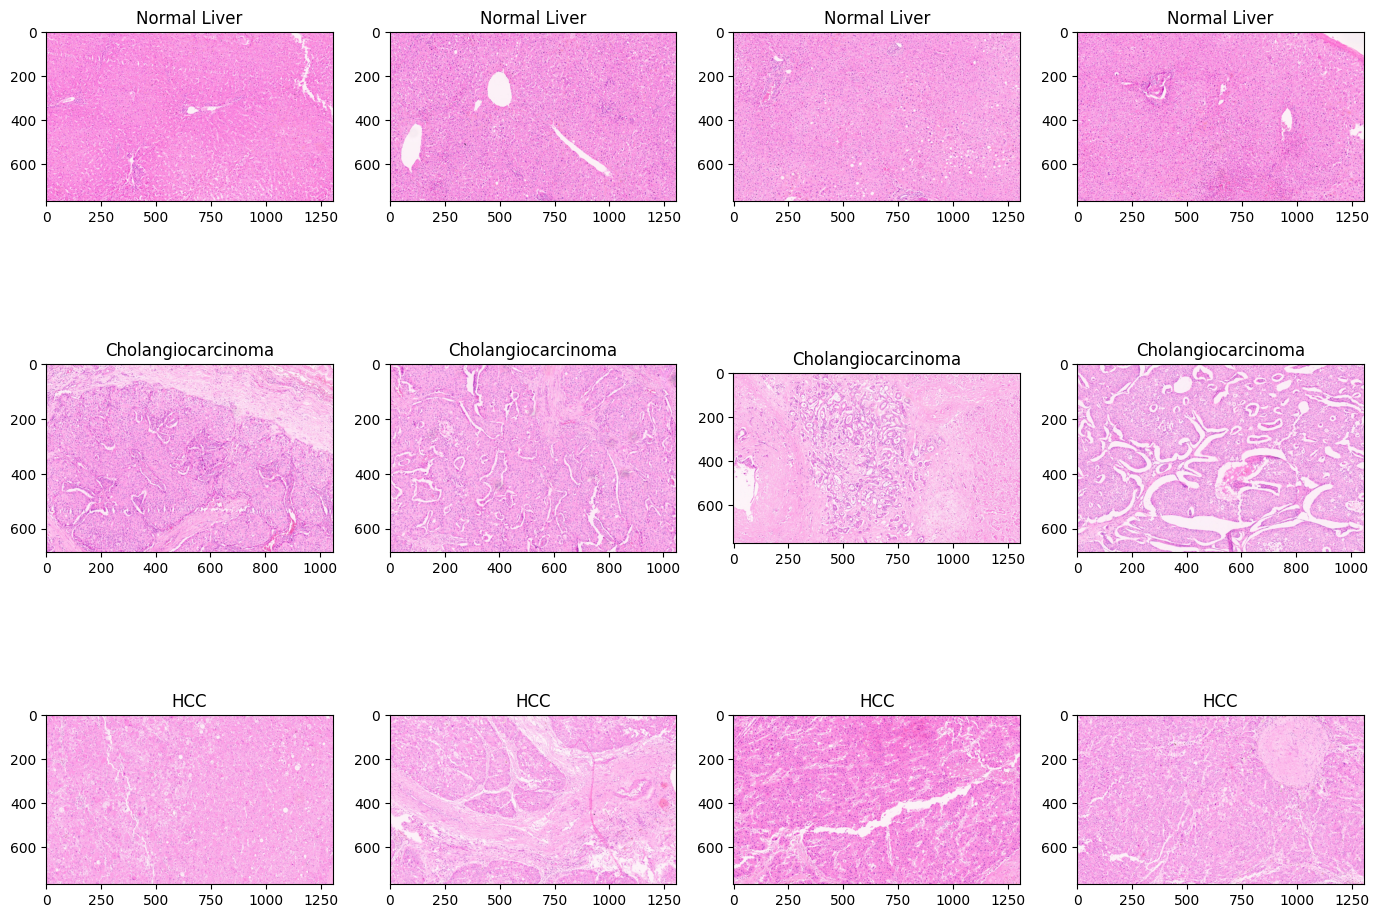

In [ ]:
!pip install matplotlib
import os
import matplotlib.pyplot as plt
import random

# Data Visualisation

train_dir = "/content/drive/MyDrive/Data set resize/train"
test_dir = "/content/drive/MyDrive/Data set resize/test"

classes = os.listdir(train_dir)

files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x: train_dir + '/' + c + '/' + x, os.listdir(train_dir + '/' + c)))

plt.figure(figsize=(17, 17))
index = 0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range(1, 5):
    index += 1
    plt.subplot(4, 4, index)
    plt.imshow(plt.imread(path_list[i]))
    plt.title(c)

In [ ]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(256, 256))
for images, _ in training_data.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

I traie with different models like CNN, Resnet50, VGG16 & Dense NET

# model building using CNN



Import Important Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
BATCH_SIZE = 32

# Define paths to train, test, and validation data
train_data_dir = '/content/drive/MyDrive/Data set resize/train'
test_data_dir = '/content/drive/MyDrive/Data set resize/test'
validation_data_dir = '/content/drive/MyDrive/Data set resize/val'

In [ ]:
# Define data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax') # Change 3 to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)

Found 147 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Epoch 1/50
4/4 [==============================] - 20s 5s/step - loss: 1.1948 - accuracy: 0.3438 - val_loss: 1.1071 - val_accuracy: 0.4062
Epoch 2/50
4/4 [==============================] - 15s 4s/step - loss: 1.0973 - accuracy: 0.4087 - val_loss: 1.0926 - val_accuracy: 0.2812
Epoch 3/50
4/4 [==============================] - 15s 4s/step - loss: 1.0822 - accuracy: 0.3478 - val_loss: 1.0190 - val_accuracy: 0.5312
Epoch 4/50
4/4 [==============================] - 16s 4s/step - loss: 1.0016 - accuracy: 0.5391 - val_loss: 0.8879 - val_accuracy: 0.5312
Epoch 5/50
4/4 [==============================] - 15s 4s/step - loss: 0.9309 - accuracy: 0.4957 - val_loss: 1.0982 - val_accuracy: 0.4062
Epoch 6/50
4/4 [==============================] - 15s 3s/step - loss: 0.9494 - accuracy: 0.5130 - val_loss: 0.7735 - val_accuracy: 0.6875
Epoch 7/50
4/4 [==============================] - 15s 3s/step - loss: 0.8328 - accuracy: 0.

It is not a good model beacause it gives only accuracu of 66.67%


# model building using Resnet50


Import Important Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define constants
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32

# Define paths to train, test, and validation data
train_data_dir = '/content/drive/MyDrive/Data set resize/train'
test_data_dir = '/content/drive/MyDrive/Data set resize/test'
validation_data_dir = '/content/drive/MyDrive/Data set resize/val'


In [ ]:
# Define data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a softmax layer for classification
predictions = Dense(3, activation='softmax')(x)  # Change 3 to the number of classes you have

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)


Found 147 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
4/4 [==============================] - 43s 9s/step - loss: 1.7855 - accuracy: 0.3130 - val_loss: 1.9178 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 36s 8s/step - loss: 1.9481 - accuracy: 0.3565 - val_loss: 1.4567 - val_accuracy: 0.3438
Epoch 3/20
4/4 [==============================] - 37s 9s/step - loss: 1.3523 - accuracy: 0.3478 - val_loss: 1.5123 - val_accuracy: 0.3438
Epoch 4/20
4/4 [==============================] - 37s 9s/step - loss: 1.3919 - accuracy: 0.3043 - val_loss: 1.3895 - val_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 37s 10s/step - loss: 1.2261 - accuracy: 0.3565 - val_loss: 1.0573 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 37s 9s/step - loss: 1.1096 - accuracy: 0.3826 - val_loss: 1.0841 - val_accuracy: 0.3750
Epoch 7/20
4/4 [=========

It is giving only accuracy of 54.76% so it's not a good model


# model building using DenseNet

Import Important Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define constants
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32

# Define paths to train, test, and validation data
train_data_dir = '/content/drive/MyDrive/Data set resize/train'
test_data_dir = '/content/drive/MyDrive/Data set resize/test'
validation_data_dir = '/content/drive/MyDrive/Data set resize/val'


In [ ]:
# Define data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:
# Load the pre-trained DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a softmax layer for classification
predictions = Dense(3, activation='softmax')(x)  # Change 3 to the number of classes you have

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)


Found 147 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Epoch 1/15
4/4 [==============================] - 48s 11s/step - loss: 1.3543 - accuracy: 0.5234 - val_loss: 0.8687 - val_accuracy: 0.4688
Epoch 2/15
4/4 [==============================] - 31s 7s/step - loss: 0.8750 - accuracy: 0.5913 - val_loss: 0.7500 - val_accuracy: 0.6875
Epoch 3/15
4/4 [==============================] - 31s 9s/step - loss: 0.9013 - accuracy: 0.6696 - val_loss: 0.3989 - val_accuracy: 0.8438
Epoch 4/15
4/4 [==============================] - 31s 7s/step - loss: 0.6327 - accuracy: 0.6957 - val_loss: 0.3533 - val_accuracy: 0.9375
Epoch 5/15
4/4 [==============================] - 35s 8s/step - loss: 0.3285 - accuracy: 0.8696 - val_loss: 0.3825 - val_accuracy: 0.9062
Epoch 6/15
4/4 [==============================] - 35s 9s/step - loss: 0.3208 - accuracy: 0.8783 - val_loss: 0.3138 - val_accuracy: 0.8438
Epoch 7/15
4/4 [==============================] - 30s 9s/step - loss: 0.2334 - accuracy: 0

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.689121 to fit



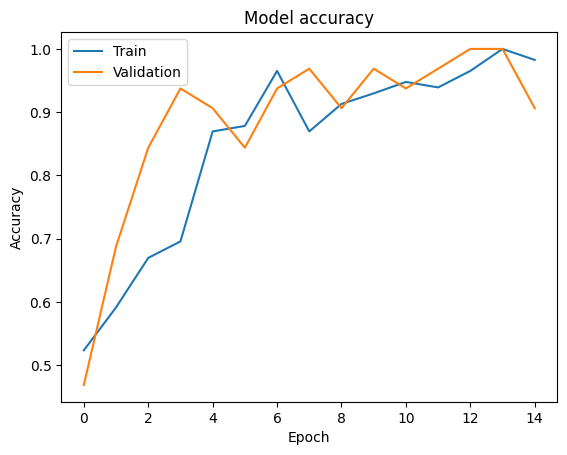

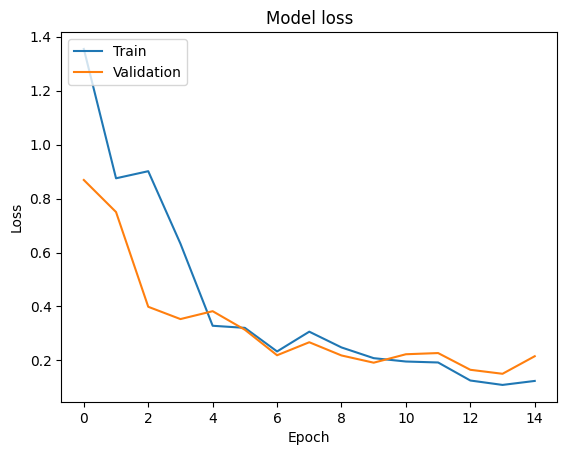

2/2 - 8s - loss: 0.1894 - accuracy: 0.9286 - 8s/epoch - 4s/step

Test loss: 0.1894451528787613
Test accuracy: 0.9285714030265808


In [ ]:
import matplotlib.pyplot as plt

# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest loss:', test_loss)
print('Test accuracy:', test_acc)


# model building using VGG16

Import Important Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define constants
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32

# Define paths to train, test, and validation data
train_data_dir = '/content/drive/MyDrive/Data set resize/train'
test_data_dir = '/content/drive/MyDrive/Data set resize/test'
validation_data_dir = '/content/drive/MyDrive/Data set resize/val'

In [ ]:
# Define data generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

In [ ]:

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a softmax layer for classification
predictions = Dense(3, activation='softmax')(x)  # Change 3 to the number of classes you have

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc)


Found 147 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Epoch 1/100
4/4 [==============================] - 93s 26s/step - loss: 1.1623 - accuracy: 0.3391 - val_loss: 1.0087 - val_accuracy: 0.5938
Epoch 2/100
4/4 [==============================] - 86s 22s/step - loss: 1.0511 - accuracy: 0.4696 - val_loss: 0.9317 - val_accuracy: 0.4062
Epoch 3/100
4/4 [==============================] - 86s 22s/step - loss: 0.9379 - accuracy: 0.4435 - val_loss: 0.8185 - val_accuracy: 0.8438
Epoch 4/100
4/4 [==============================] - 90s 25s/step - loss: 0.8645 - accuracy: 0.6696 - val_loss: 0.7221 - val_accuracy: 0.6875
Epoch 5/100
4/4 [==============================] - 88s 22s/step - loss: 0.8388 - accuracy: 0.5652 - val_loss: 0.6706 - val_accuracy: 0.8125
Epoch 6/100
4/4 [==============================] - 89s 22s/step - loss: 0.7695 - accuracy: 0.7217 - val_loss: 0.5891 - val_accuracy: 0.9062
Epoch 7/100
4/4 [==============================] - 88s 22s/step - loss: 0.7404 

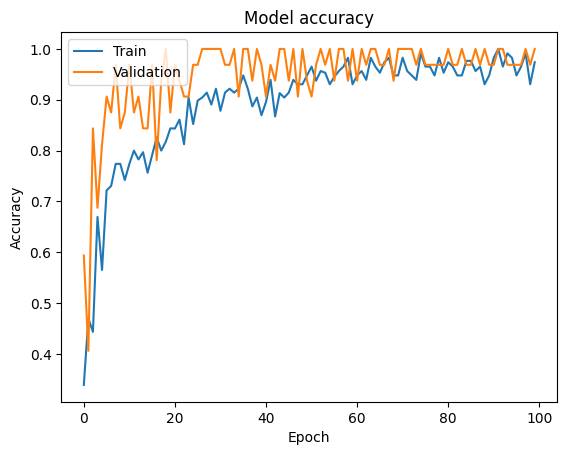

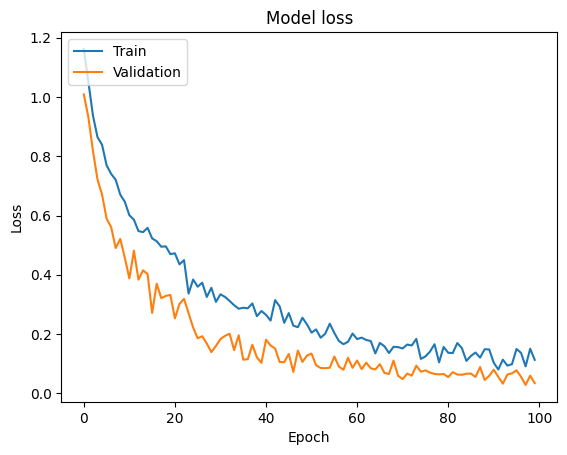

2/2 - 26s - loss: 0.0632 - accuracy: 0.9762 - 26s/epoch - 13s/step

Test loss: 0.06315604597330093
Test accuracy: 0.976190447807312


In [ ]:
import matplotlib.pyplot as plt

# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg16_model_plot.png', show_shapes=True, show_layer_names=True)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest loss:', test_loss)
print('Test accuracy:', test_acc)
